In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('../data/diabetic_readmission_data.csv')
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
# There are 101,766 rows and 50 columns
print(df.shape)

(101766, 50)


In [3]:
# Examine data, there are some hidden columns
# show all columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
# Because there are many of hidden columns & hidden rows,
#in order to have an overview of dataframe, try to see through all of them
#there are a lot missing value columns & cells
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
# examine the common stats of numeric columns
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [7]:
# examine the bool & object with describe
df.describe(include=['object', 'bool'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [8]:
# loop through the data of each column, find the column has value of cell which is object =='?' then count

for col in df.columns:
    if df[col].dtype == object:
         print(col, df[col][df[col] == '?'].count())

# There are 101,766 rows and 50 columns
print(df.shape)

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
(101766, 50)


In [9]:
# Because 'readmitted' is a very important feature to look through therefore need to check to see all possible value of data in column
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [10]:
# Because gender is a important feature to look through therefore need to check to see all possible value of data in column
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [11]:
# to count how many missing data cell in gender column
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [12]:
# Because weight, payer_code, medical_specialty missing value are 96%, 40% & 49% accordingly.
# Besides, i don't see they are really useful for analysis this secenario, dicided to delette them.
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace = True)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# There is no duplicated value in column patient_nbr
df[df.duplicated(keep=False)].sort_values(by='patient_nbr')

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [14]:
##### Because 'readmitted' is a very important feature to look through therefore need to check to see all possible value of data in column
reamitted_values = df['readmitted'].unique()
print(reamitted_values)

['NO' '>30' '<30']


In [15]:
# examine the bool & object with describe
df.describe(include=['object', 'bool'])

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,717,749,790,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [16]:
#Recheck
df['repaglinide'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [17]:
df['citoglipton'].unique()

array(['No'], dtype=object)

In [18]:
df['examide'].unique()

array(['No'], dtype=object)

In [19]:
df['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [20]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [21]:
#since those columns' values are all 'No', we can drop them
#df = df.drop(['citoglipton', 'examide'], axis = 1, inplace = True)
df.head(4)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [22]:
#add new feature age_under
#replace all instances of grouped age with the last value in the group.
df['age'].replace(to_replace = '[0-10)', value = 10, inplace=True)
df['age'].replace(to_replace = '[10-20)', value = 20, inplace=True)
df['age'].replace(to_replace = '[20-30)', value = 30, inplace=True)
df['age'].replace(to_replace = '[30-40)', value = 40, inplace=True)
df['age'].replace(to_replace = '[40-50)', value = 50, inplace=True)
df['age'].replace(to_replace = '[50-60)', value = 60, inplace=True)
df['age'].replace(to_replace = '[60-70)', value = 70, inplace=True)
df['age'].replace(to_replace = '[70-80)', value = 80, inplace=True)
df['age'].replace(to_replace = '[80-90)', value = 90, inplace=True)
df['age'].replace(to_replace = '[90-100)', value = 100, inplace=True)


In [23]:
df.head(15)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,50,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,60,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,70,3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,80,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,90,2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,100,3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [24]:
df.groupby(['time_in_hospital','readmitted']).sum()
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,50,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,60,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,70,3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,80,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,90,2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,100,3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


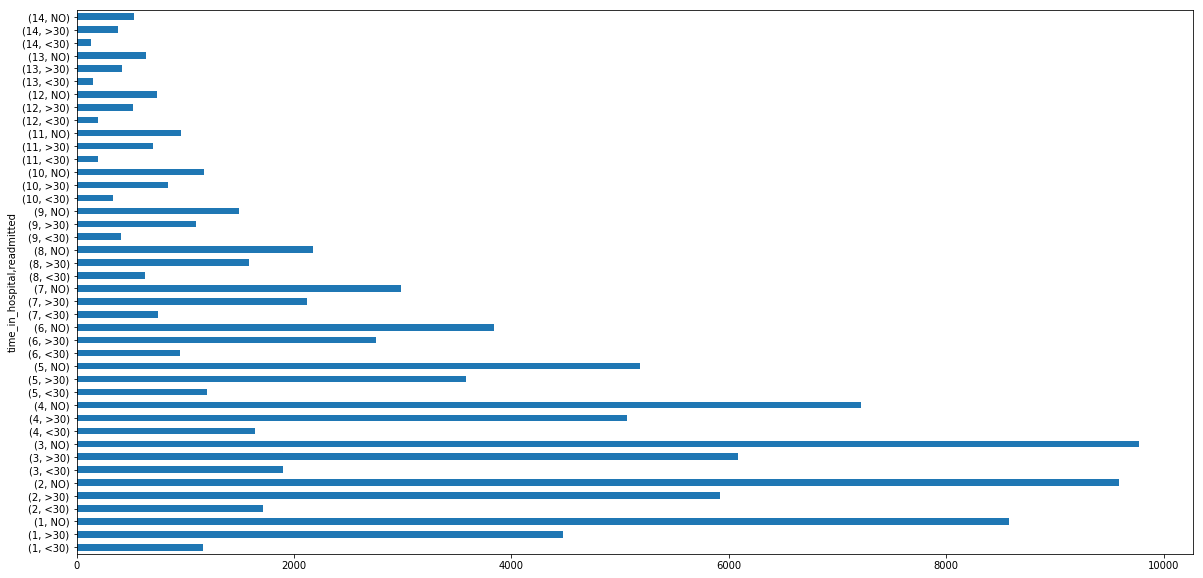

In [25]:
df.groupby(['time_in_hospital','readmitted'])['readmitted'].count().plot(kind='barh',figsize = (20,10))

In [26]:
indexes_to_drop1 = list(df[df["race"] == "?"].index)
indexes_to_drop2 = list(df[df["diag_1"] == '?'].index)
indexes_to_drop3 = list(df[df["diag_2"] == '?'].index)
indexes_to_drop4 = list(df[df["diag_3"] == '?'].index)

In [27]:
indexes_to_drop = []
indexes_to_drop.extend(indexes_to_drop1)
indexes_to_drop.extend(indexes_to_drop2)
indexes_to_drop.extend(indexes_to_drop3)
indexes_to_drop.extend(indexes_to_drop4)
indexes_to_drop = set(indexes_to_drop)

In [28]:
df.drop(index = indexes_to_drop, inplace = True)

In [29]:
df['diag_1']

1            276
2            648
3              8
4            197
5            414
6            414
7            428
8            398
9            434
10         250.7
11           157
12           428
13           428
14           518
15           999
16           410
17           682
18           402
22           410
23           V57
24           189
25           786
26           427
27           996
28           277
29           428
30           584
31           462
32           996
33           473
           ...  
101736       590
101737       182
101738       275
101739       414
101740       414
101741       820
101742     250.8
101743       486
101744       427
101745       682
101746       427
101747       410
101748       295
101749       715
101750       574
101751       424
101752       348
101753     250.8
101754       574
101755       592
101756       996
101757       491
101758       292
101759       435
101760       345
101761    250.13
101762       560
101763        

In [30]:
df['diag_2'].head(15)

1     250.01
2        250
3     250.43
4        157
5        411
6        411
7        492
8        427
9        198
10       403
11       288
12    250.43
13       411
14       998
15       507
Name: diag_2, dtype: object

In [31]:
df['diag_3'].head(15)

1       255
2       V27
3       403
4       250
5       250
6       V45
7       250
8        38
9       486
10      996
11      197
12    250.6
13      427
14      627
15      996
Name: diag_3, dtype: object

In [32]:
#Feature Engineering
#create a column to group <30 and >30 into True and 'NO' to False.
df['readmit'] = df['readmitted'].map({'NO': False, '>30': True, '<30': True})
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
1,149190,55629189,Caucasian,Female,20,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,True
2,64410,86047875,AfricanAmerican,Female,30,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,False
3,500364,82442376,Caucasian,Male,40,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,False
4,16680,42519267,Caucasian,Male,50,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,False
5,35754,82637451,Caucasian,Male,60,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,True
6,55842,84259809,Caucasian,Male,70,3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,False
7,63768,114882984,Caucasian,Male,80,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,True
8,12522,48330783,Caucasian,Female,90,2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,False
9,15738,63555939,Caucasian,Female,100,3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,False
10,28236,89869032,AfricanAmerican,Female,50,1,1,7,9,47,2,17,0,0,0,250.7,403,996,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,True


In [33]:
df.groupby(['time_in_hospital', 'readmitted'])['patient_nbr', 'encounter_id'].count()

patient_nbr  encounter_id
time_in_hospital readmitted                           
1                <30                1127          1127
                 >30                4311          4311
                 NO                 8052          8052
2                <30                1650          1650
                 >30                5745          5745
                 NO                 9046          9046
3                <30                1848          1848
                 >30                5920          5920
                 NO                 9281          9281
4                <30                1589          1589
                 >30                4941          4941
                 NO                 6904          6904
5                <30                1180          1180
                 >30                3512          3512
                 NO                 5007          5007
6                <30                 924           924
                 >30                2694          2694
                 NO                 3702          3702
7                <30                 733           733
                 >30                2084          2084
                 NO                 2877          2877
8                <30                 615           615
                 >30                1559          1559
                 NO                 2102          2102
9                <30                 404           404
                 >30                1075          1075
                 NO                 1449          1449
10               <30                 333           333
                 >30                 819           819
                 NO                 1135          1135
11               <30                 191           191
                 >30                 684           684
                 NO                  934           934
12               <30                 193           193
                 >30                 513           513
                 NO                  718           718
13               <30                 147           147
                 >30                 418           418
                 NO                  620           620
14               <30                 132           132
                 >30                 374           374
                 NO                  511           511

In [34]:
df.groupby(['time_in_hospital', 'gender'])['patient_nbr'].count()

time_in_hospital  gender         
1                 Female             6585
                  Male               6904
                  Unknown/Invalid       1
2                 Female             8684
                  Male               7757
3                 Female             9254
                  Male               7795
4                 Female             7421
                  Male               6013
5                 Female             5350
                  Male               4349
6                 Female             4157
                  Male               3163
7                 Female             3155
                  Male               2539
8                 Female             2355
                  Male               1921
9                 Female             1618
                  Male               1310
10                Female             1257
                  Male               1030
11                Female             1012
                  Male                797


In [35]:
print(df.describe())

       encounter_id   patient_nbr           age  admission_type_id  \
count  9.805300e+04  9.805300e+04  98053.000000       98053.000000   
mean   1.658294e+08  5.484792e+07     71.260339           2.025813   
std    1.024322e+08  3.866175e+07     15.590751           1.450117   
min    1.252200e+04  1.350000e+02     10.000000           1.000000   
25%    8.528566e+07  2.350234e+07     60.000000           1.000000   
50%    1.533019e+08  4.687790e+07     70.000000           1.000000   
75%    2.305007e+08  8.800306e+07     80.000000           3.000000   
max    4.438672e+08  1.895026e+08    100.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              98053.000000         98053.000000      98053.000000   
mean                   3.753368             5.776692          4.421976   
std                    5.309392             4.071640          2.993074   
min                    1.000000             1.000000          1.000000   

[3, 2, 1, 4, 5, 13, 12, 9, 7, 10, 11, 6, 8, 14]
[6904, 7757, 7795, 6013, 4349, 3163, 2539, 1921, 1310, 1030, 797, 641, 546, 454]
[6585, 8684, 9254, 7421, 5350, 4157, 3155, 2355, 1618, 1257, 1012, 783, 639, 563]


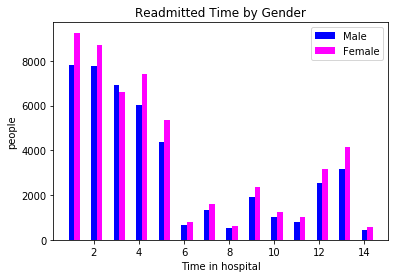

In [36]:
# visualize readmitted count by gender
df.groupby(['time_in_hospital', 'gender'])['patient_nbr'].count()
x = list(df['time_in_hospital'].unique())
y_male = list(df.loc[:][df['gender'] == 'Male'].groupby(['time_in_hospital', 'gender'])['patient_nbr'].count())
y_female = list(df.loc[:][df['gender'] == 'Female'].groupby(['time_in_hospital', 'gender'])['patient_nbr'].count())

print(x)
print(y_male)
print(y_female)

# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
width = 0.25 #try to show separately as many column as possible
#plt.bar(x, y_male, label='Male')
plt.bar(x, y_male, width, color='blue', label='Male') 
plt.bar([i + width for i in x], y_female, width, color='magenta', label='Female') 

# Add labels for x and y axes
plt.xlabel('Time in hospital')
plt.ylabel('people')

# Add a title for the plot
plt.title('Readmitted Time by Gender')

# Add a legend to the plot with legend() in lower right corner
plt.legend()

# Output the final plot
plt.show()

[20, 30, 40, 50, 60, 70, 80, 90, 100, 10]
age  readmitted
10   <30              1
20   <30             31
30   <30            213
40   <30            408
50   <30           1000
60   <30           1638
70   <30           2460
80   <30           3004
90   <30           2012
100  <30            299
Name: patient_nbr, dtype: int64
age  readmitted
10   >30             13
20   >30            164
30   >30            460
40   >30           1142
50   >30           3189
60   >30           5804
70   >30           7735
80   >30           9263
90   >30           6086
100  >30            793
Name: patient_nbr, dtype: int64


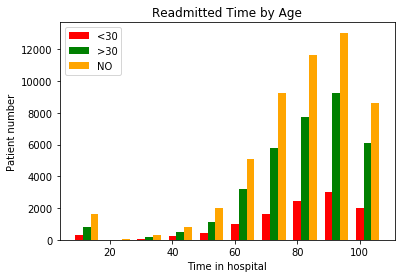

In [37]:
# visualize readmitted count by gender
df.groupby(['age', 'readmitted'])['patient_nbr'].count()
x = list(df['age'].unique())
y_1 = df.loc[:][df['readmitted'] == '<30'].groupby(['age', 'readmitted'])['patient_nbr'].count()
y_2 = df.loc[:][df['readmitted'] == '>30'].groupby(['age', 'readmitted'])['patient_nbr'].count()
y_3 = df.loc[:][df['readmitted'] == 'NO'].groupby(['age', 'readmitted'])['patient_nbr'].count()

print(x)
print(y_1)
print(y_2)

# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
width = 2.5 #try to show separately as many column as possible
plt.bar(x, y_1, width, color='red', label='<30') 
plt.bar([i + width for i in x], y_2, width, color='green', label='>30') 
plt.bar([i + width*2 for i in x], y_3, width, color='orange', label='NO') 

# Add labels for x and y axes
plt.xlabel('Time in hospital')
plt.ylabel('Patient number')

# Add a title for the plot
plt.title('Readmitted Time by Age')

# Add a legend to the plot with legend() in lower right corner
plt.legend()

# Output the final plot
#plt.show()

[('428', 4002), ('414', 2658), ('786', 1667), ('486', 1646), ('410', 1412), ('491', 1325), ('427', 1208), ('996', 1026), ('276', 943), ('682', 929)]
['428', '414', '786', '486', '410', '491', '427', '996', '276', '682']
[4002, 2658, 1667, 1646, 1412, 1325, 1208, 1026, 943, 929]


Text(0.5, 1.0, 'Readmit By Diag Code')

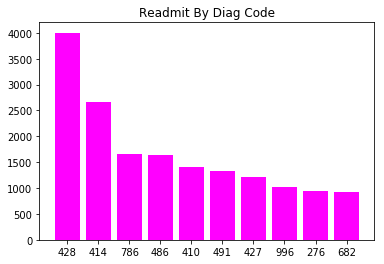

In [44]:
# get all rows with 'readmit' is True, then groupby 'diag_1' to count number of readmit
# then, convert to a dictionary
readmit_by_diag_1_dict = dict(df[df['readmit'] == True].groupby(['diag_1'])['readmit'].count())

# sort the dictionary to find the top readmit count by diag_1 code
sorted_readmit_by_diag_1_dict = sorted(readmit_by_diag_1_dict.items(), key=lambda item : item[1], reverse=True)
sorted_readmit_by_diag_1_dict

# get top 10 diag_1 code for readmit
top_10_readmit_by_diag_1 = sorted_readmit_by_diag_1_dict[:10]
print(top_10_readmit_by_diag_1)

# visualize 
x = [item[0] for item in top_10_readmit_by_diag_1]
y = [item[1] for item in top_10_readmit_by_diag_1]
print(x)
print(y)

plt.bar(x, y, color='magenta', label='Readmit Count')
plt.title("Readmit By Diag Code")

In [45]:
df.head(5).T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,20,30,40,50,60
admission_type_id,1,1,1,1,2
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,2
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
